In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import hist
from hist import Hist
import mplhep as hep
import math
#import acceptance_limitingTheta as file

#f = uproot.open("/home/submit/marinamn/fccee/FCCAnalyzer/tmp/output_hadron_xsec.root")

file = np.load("new_result_acceptances.npz")
A = file["acceptances"]
E = file['errors']
ang = file['angles']
R = file['ratios']
sig = file['sig']

[7.93691602 7.93691602 8.07877705 5.21997166 3.11137456 1.77951085]
[0.994679 0.994679 0.994608 0.986716 0.976928 0.963093]
[0.995465 0.995465 0.995413 0.987548 0.977584 0.963566]
[7.27508554e-05 7.27508554e-05 7.32320035e-05 1.14488145e-04
 1.50132218e-04 1.88533481e-04]
[6.71895362e-05 6.71895362e-05 6.75718834e-05 1.10891603e-04
 1.48032169e-04 1.87367456e-04]


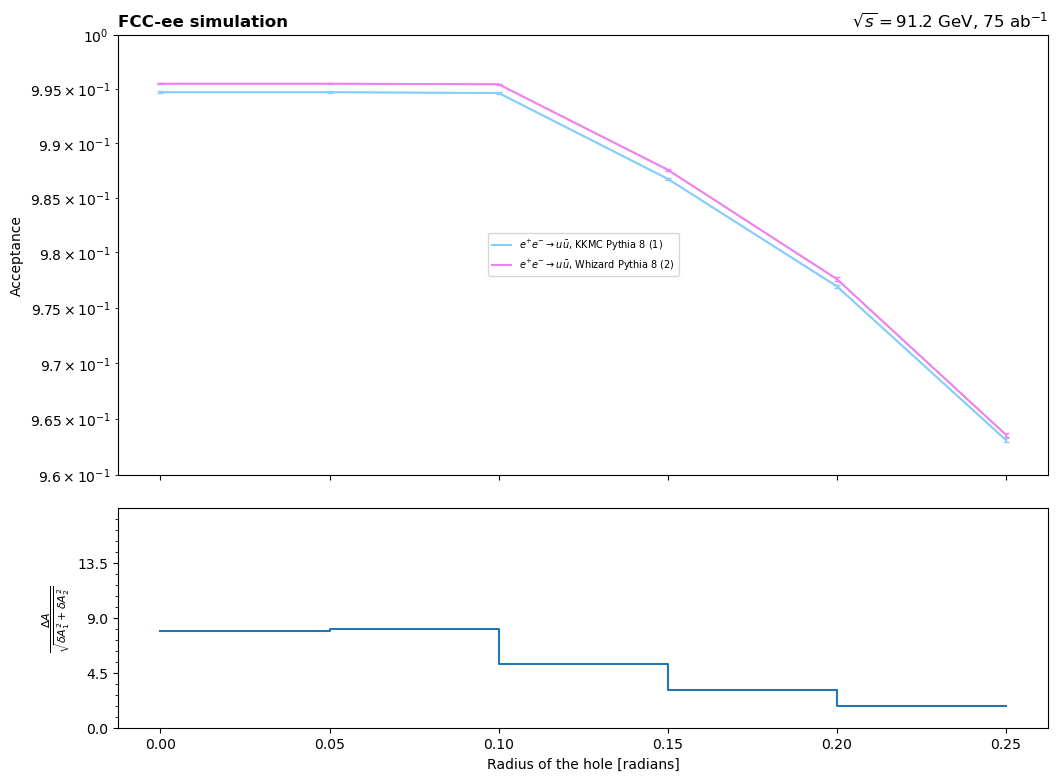

In [3]:
fig = plt.figure(figsize = [12,9])
gs = fig.add_gridspec(2, hspace=0.1, height_ratios = (2,1))
axs = gs.subplots(sharex=True)
axs[0].set_title("FCC-ee simulation", loc= "left", weight = "bold")
axs[0].set_title(r"$\sqrt{s} = 91.2 $ GeV, 75 ab$^{-1}$", loc = "right")

axs[0].plot(ang,A[0], color = "lightskyblue", label = r"$e^{+} e^{-} \rightarrow u \bar{u}$, KKMC Pythia 8 (1)")
axs[0].errorbar(ang, A[0], yerr=E[0],linewidth=1,capsize = 2, color = "lightskyblue")
axs[0].plot(ang,A[1], color = "violet", label = r"$e^{+} e^{-} \rightarrow u \bar{u}$, Whizard Pythia 8 (2)")
axs[0].errorbar(ang,A[1], yerr=E[1],linewidth=1, capsize=2, color = "violet")
axs[0].set_ylim(0.96,1)
axs[1].step(ang,sig) 

axs[0].set_ylabel("Acceptance")
axs[0].set_yscale("log")
axs[0].legend(loc = "center", fontsize = 7)
ymin = 0
ymax = 18
axs[1].set_ylim(ymin,ymax)
axs[1].set_yticks(np.arange(ymin,ymax,0.25*(ymax-ymin)))
axs[1].set_yticks(np.arange(ymin,ymax,0.05*(ymax-ymin)), minor = True)
axs[1].set_ylabel(r"$\dfrac{\Delta A}{\sqrt{\delta A_{1}^{2} + \delta A_{2}^{2}}} $", fontsize = 8)
axs[1].set_xlabel("Radius of the hole [radians]")
#axs[1].axhline(y = 1, color = 'gray', linestyle = 'solid', linewidth = "0.5")

for ax in axs:
    ax.label_outer()
            
#plt.savefig(f"new_a_vs_theta_plot.png")
print(sig)


print(A[0])
print((A[1]))
print((E[0]))
print(E[1])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x2ac3ba3cddf0>, errorbar=None, legend_artist=None)]

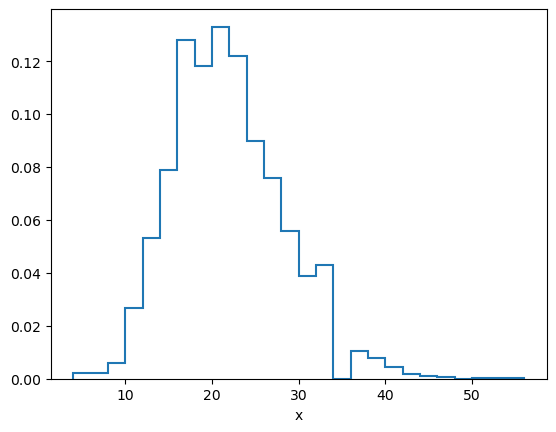

In [3]:
LEP_values = np.array([0.002,0.0021,0.0058,0.0266,0.0531,0.079,0.128,0.118,0.133,0.122,0.09,0.076,0.0559,0.0389,0.0264,0.0166,0.0105,0.008,0.0044,0.0019,0.00091,0.00076,0.00003,0.00038,0.00023,0.00013])
lep = Hist(hist.axis.Regular(26, 4, 56, name = "x"))
xs = [4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54]
lep.fill(xs, weight=LEP_values)
hep.histplot(lep)
